<a href="https://colab.research.google.com/github/DhavaAdePratama/AttritionRateAnalysis/blob/main/Proyek_DS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Dhava Ade Pratama
- Email:dhavaadepratama23@gmail.com
- Id Dicoding:DHAVA ADE PRATAMA

## Persiapan

#### Business Understanding

proyek ini membahas tentang permasalahan sebuah perusahaan yang terus mengalami penurunan jumlah karyawan .

Tujuan proyek ini agar kita dapat mengidentifikasi kenapa para karyawan memilih untuk keluar dari pada bertahan di dalam perusahaan ini.


### Menyiapkan library yang dibutuhkan

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


### Menyiapkan data yang akan digunakan

In [48]:
df= pd.read_csv('employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

pada employee_data ini kita memiliki 35 kolom data serta memiliki 1470 baris data

In [50]:
df.duplicated().sum()

np.int64(0)

In [51]:
df.describe()

,EmployeeId,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,735.500000,36.923810,0.169187,802.485714,9.192517,2.912925,1.0,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,403.509100,8.106864,1.024165,0.0,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,465.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,802.000000,7.000000,3.000000,1.0,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,1157.000000,14.000000,4.000000,1.0,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1470.000000,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


dari analisis deskriptif diatas tidak ada mengindikasikan data data yang tidak wajar

In [52]:
df.isna().sum()

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


disini dapat terlihat kita memiliki 412 data kosong pada kolom attrition

In [53]:
attrition_employe_group = df.groupby('Attrition').size()
print(attrition_employe_group)

Attrition
0.0    879
1.0    179
dtype: int64


berdasarkan data pada kalimat pengantar diterangkan bahwa attrition rate lebih dari 10% nah, disini kita mengganti data kosong pada kolom attrition menjadi true atau 1 dengan alasan : karena pada **pengantar submission dikatakan bahwa terdapat lebih dari 10% pekerja keluar**, kemmudian terlihat pada describe data ada **1470 employed**, kita lihat jumlah data pada attrition yang memiliki keterangan** no ada 879 dan yes ada 179 **kemudian kita juga memiliki data yang miss berjumlah 412 disini bisa disimpulkan **employe = 1470 - 10% = 147 employe**, bisa dilihat data yang memiliki nilai no terdapat 179 orang maka hal tersebut telah sesuai dengan kriteria pengantar yaitu lebih dari 10% jadi kita dapat menjadikan nilai miss tersebut bernilai no / 0 , yang berarti no attrition employee

## Data Preparation / Preprocessing

In [54]:
df['Attrition'] = df['Attrition'].fillna(0)

attrition_group= df.groupby('Attrition').size()
print(attrition_group)


Attrition
0.0    1291
1.0     179
dtype: int64


In [55]:
df['Attrition'] = df['Attrition'].map({1: 'Yes', 0: 'No'})

df['Attrition'] = df['Attrition'].astype(str)

mengisi nilai yang miss dengan nilai 0 / no

#### EXPLORATORY DATA ANALYSIS (EDA)

<ipython-input-56-cec0f2f8c28d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')


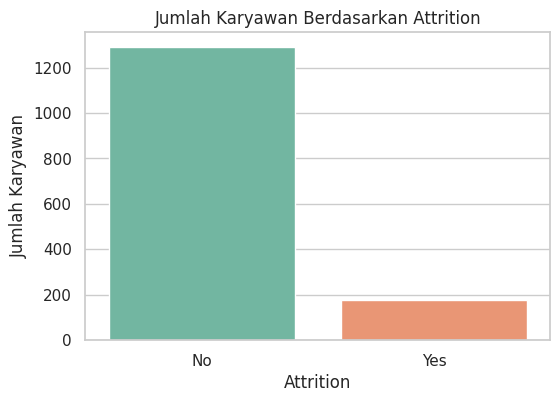

In [56]:
attrition_counts = df['Attrition'].value_counts()

sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values, palette='Set2')

plt.title('Jumlah Karyawan Berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('Jumlah Karyawan')
plt.show()

In [78]:
main_df = df[[
    'Attrition',
    'MaritalStatus',
    'NumCompaniesWorked',
    'OverTime',
    'MonthlyIncome',
    'JobSatisfaction',
    'EnvironmentSatisfaction',
    'WorkLifeBalance',
    'YearsSinceLastPromotion',
    'DistanceFromHome',
    'JobInvolvement',
    'TotalWorkingYears',
    'YearsAtCompany',
    ]]

main_df.head(5)


,Attrition,MaritalStatus,NumCompaniesWorked,OverTime,MonthlyIncome,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,YearsSinceLastPromotion,DistanceFromHome,JobInvolvement,TotalWorkingYears,YearsAtCompany
0,No,Married,0,Yes,2991,2,4,3,1,1,3,7,6
1,Yes,Married,5,No,4777,2,1,1,0,11,1,15,1
2,Yes,Married,9,Yes,2461,3,1,4,2,4,3,18,10
3,No,Married,5,No,13525,2,3,4,4,26,3,23,20
4,No,Married,2,No,2001,3,3,3,0,2,3,20,5


kita mulai mengambil kolom kolom yang lebih berkorelasi dengan case study nya

<ipython-input-58-5d2824fc7b4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['Attrition'] = subset_df['Attrition'].replace({1: 'Yes', 0: 'No'})
<ipython-input-58-5d2824fc7b4e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x='Attrition', y='WorkLifeBalance', ax=axs[0], palette="Set2")
<ipython-input-58-5d2824fc7b4e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=subset_df, x='Attrition', y='DistanceFromHome', a

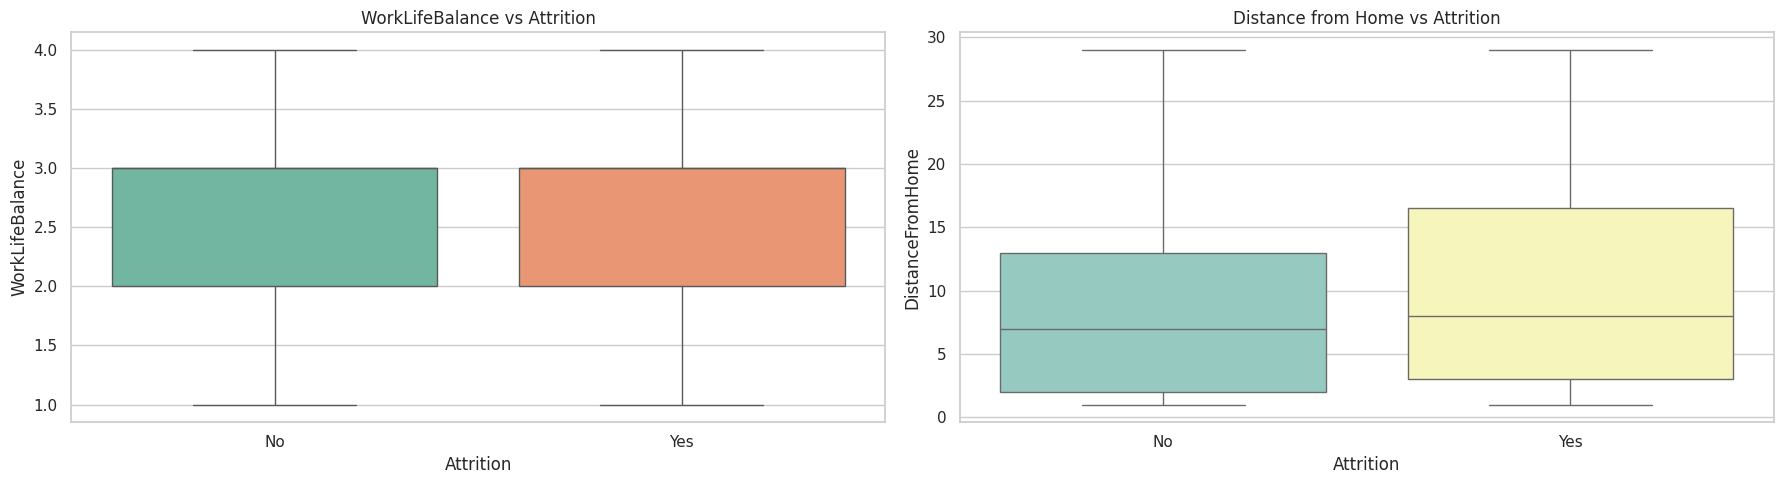

In [58]:
subset_df = main_df[['Attrition', 'WorkLifeBalance', 'DistanceFromHome']]
subset_df['Attrition'] = subset_df['Attrition'].replace({1: 'Yes', 0: 'No'})

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.boxplot(data=subset_df, x='Attrition', y='WorkLifeBalance', ax=axs[0], palette="Set2")
axs[0].set_title("WorkLifeBalance vs Attrition")


sns.boxplot(data=subset_df, x='Attrition', y='DistanceFromHome', ax=axs[1], palette="Set3")
axs[1].set_title("Distance from Home vs Attrition")

plt.tight_layout()
plt.show()


dari visualisasi ini kita peroleh karyawan yang keluar dan bertahan memiliki nilai worklifebalance yang cukup mirip, namun jika dilihat dari jarak rumah ke kantor terliaht memiliki perbedaan gap yang cukup jelas

<ipython-input-59-bffbaaf88d1a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='Attrition', y='EnvironmentSatisfaction', ax=axs[0], palette="cool")
<ipython-input-59-bffbaaf88d1a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=main_df, x='Attrition', y='JobSatisfaction', ax=axs[1], palette="summer")


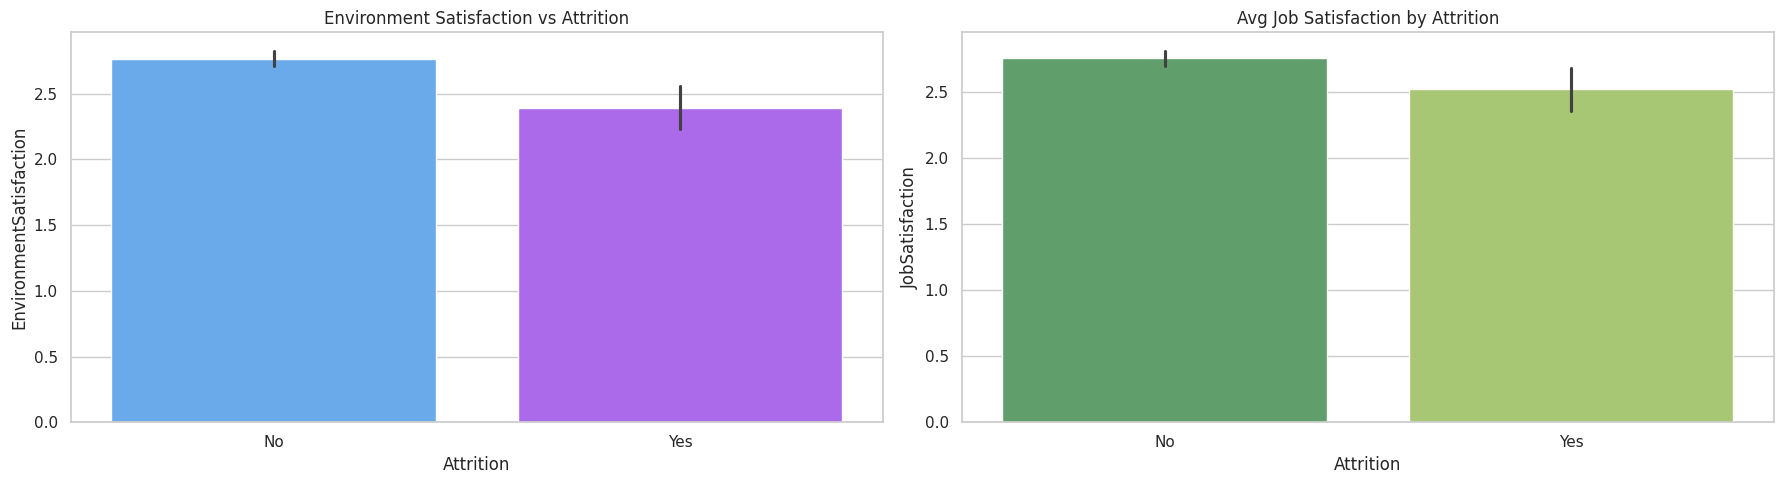

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(18, 5))

sns.barplot(data=main_df, x='Attrition', y='EnvironmentSatisfaction', ax=axs[0], palette="cool")
axs[0].set_title("Environment Satisfaction vs Attrition")

sns.barplot(data=main_df, x='Attrition', y='JobSatisfaction', ax=axs[1], palette="summer")
axs[1].set_title("Avg Job Satisfaction by Attrition")

plt.tight_layout()
plt.show()

jika dilihat dari kenyamanan lingkungan serta peran kerja nya antara karyawan yang memilih untuk keluar dan tidak juga memiliki value yang hampir mirip

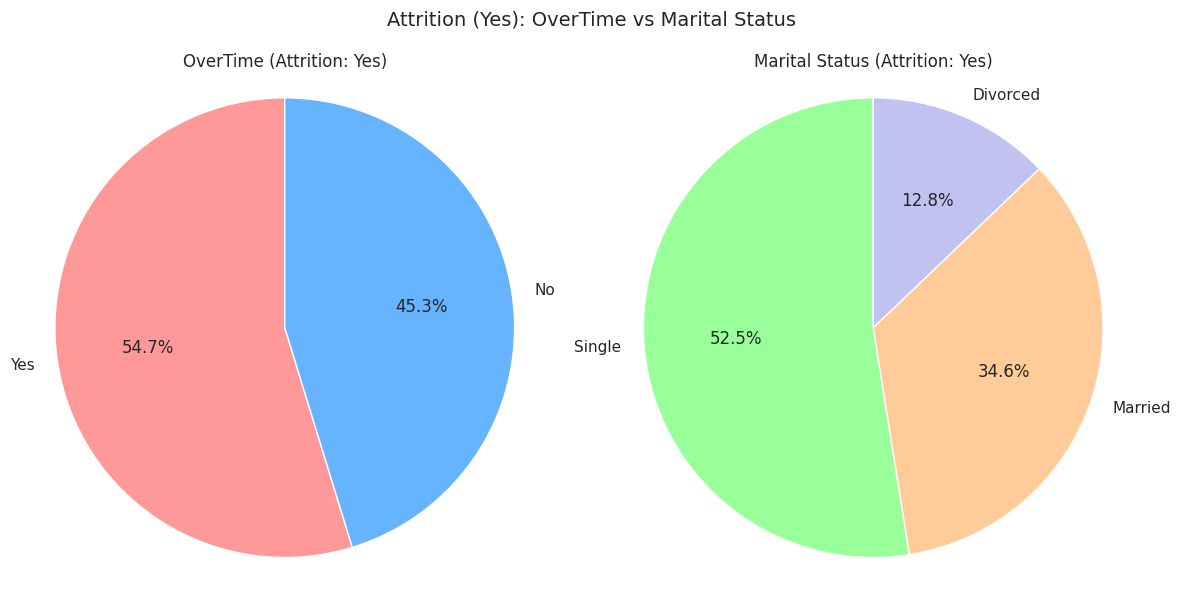

In [74]:
import matplotlib.pyplot as plt

# Filter data untuk attrition = Yes
attrition_yes_df = main_df[main_df['Attrition'] == 'Yes']

# Hitung jumlah untuk OverTime dan MaritalStatus
overtime_counts = attrition_yes_df['OverTime'].value_counts()
marital_counts = attrition_yes_df['MaritalStatus'].value_counts()

# Setup plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart untuk OverTime
axs[0].pie(overtime_counts, labels=overtime_counts.index, autopct='%1.1f%%',
           startangle=90, colors=['#ff9999', '#66b3ff'])
axs[0].set_title('OverTime (Attrition: Yes)')
axs[0].axis('equal')

# Pie chart untuk Marital Status
axs[1].pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%',
           startangle=90, colors=['#99ff99', '#ffcc99', '#c2c2f0'])
axs[1].set_title('Marital Status (Attrition: Yes)')
axs[1].axis('equal')

# Show plot
plt.suptitle('Attrition (Yes): OverTime vs Marital Status', fontsize=14)
plt.tight_layout()
plt.show()


Dari perbandingan chart di atas, kita mendapatkan informasi bahwa perbedaan jumlah karyawan yang keluar berdasarkan status OverTime tidak terlalu signifikan. Hal ini terlihat pada pie chart sebelah kiri, di mana proporsi karyawan yang keluar meskipun sering lembur (OverTime) hampir sebanding dengan mereka yang keluar meskipun tidak lembur. Artinya, OverTime bukan satu-satunya faktor utama yang memengaruhi keputusan karyawan untuk keluar dari perusahaan. Dan Jika dilihat dari status pernikahan rata rata karyawan yang keluar juga kebanyakan dari karyawan yang single

<ipython-input-67-70e606898f59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_df, x='Attrition', y='YearsSinceLastPromotion', palette='Set1')
<ipython-input-67-70e606898f59>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_df, x='Attrition', y='YearsAtCompany', palette='Set1')
<ipython-input-67-70e606898f59>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_df, x='Attrition', y='MonthlyIncome', palette='Set1')


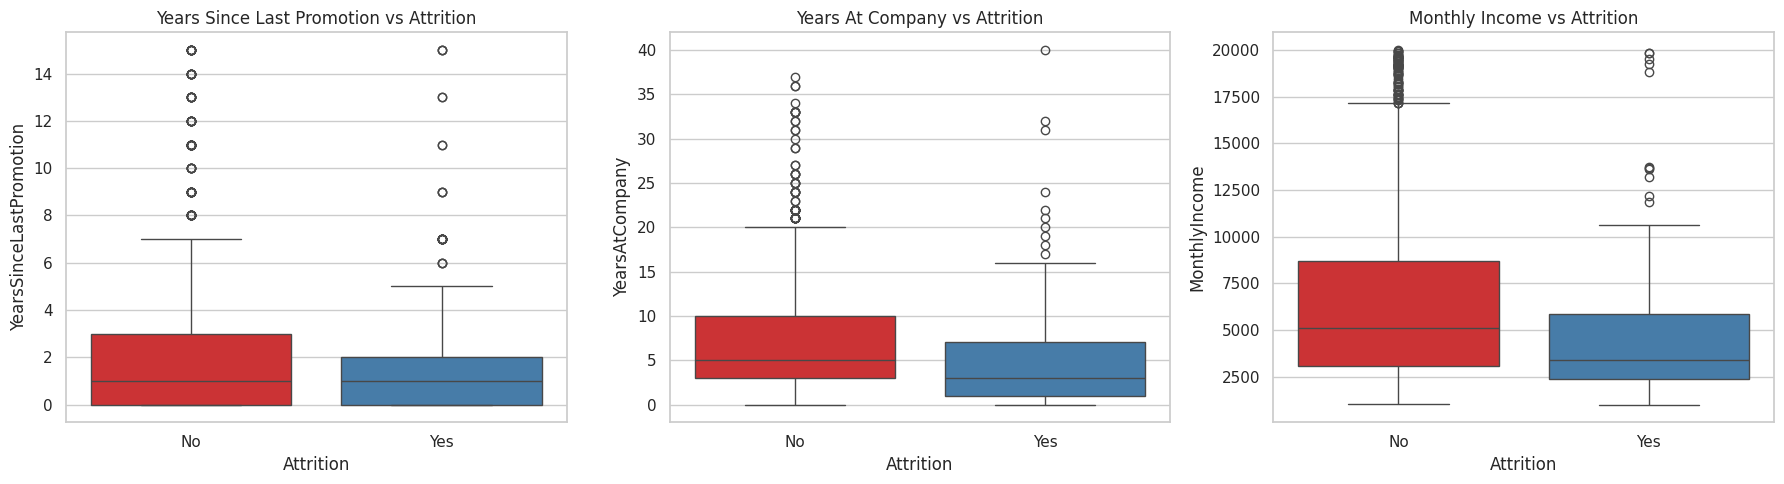

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

# YearsSinceLastPromotion
plt.subplot(1, 3, 1)
sns.boxplot(data=main_df, x='Attrition', y='YearsSinceLastPromotion', palette='Set1')
plt.title('Years Since Last Promotion vs Attrition')

# YearsAtCompany
plt.subplot(1, 3, 2)
sns.boxplot(data=main_df, x='Attrition', y='YearsAtCompany', palette='Set1')
plt.title('Years At Company vs Attrition')

# MonthlyIncome
plt.subplot(1, 3, 3)
sns.boxplot(data=main_df, x='Attrition', y='MonthlyIncome', palette='Set1')
plt.title('Monthly Income vs Attrition')

plt.tight_layout()
plt.show()


dari data ini kita dapat simpulkan karyawan yang memilih keluar kebanyakan karyawan yang termasuk cepat di promosikan, Namun memiliki gaji yang relatif kecil dibandingkan dengan karyawan memilih untuk tidak keluar

### Conclusion

Work-Life Balance dan Jarak Rumah ke Kantor:
Visualisasi data menunjukkan bahwa work-life balance antara karyawan yang keluar dan yang tetap bekerja cenderung serupa. Namun, terdapat perbedaan yang lebih jelas terkait jarak rumah ke kantor. Karyawan yang keluar lebih banyak yang memiliki jarak rumah yang lebih jauh dibandingkan mereka yang tetap bertahan. Hal ini mengindikasikan bahwa jarak ke tempat kerja bisa menjadi faktor penting yang mempengaruhi keputusan karyawan untuk tetap atau meninggalkan perusahaan.

Kenyamanan Lingkungan Kerja dan Peran Kerja:
Dari segi kenyamanan lingkungan kerja dan peran kerja, tidak ada perbedaan yang signifikan antara karyawan yang memilih untuk keluar dan yang tetap bertahan. Keduanya memiliki nilai yang hampir serupa dalam hal ini, menunjukkan bahwa faktor-faktor tersebut tidak terlalu memengaruhi keputusan karyawan dalam memilih untuk bertahan atau keluar dari perusahaan.

OverTime dan Attrition:
Dari hasil pie chart, terlihat bahwa perbedaan antara karyawan yang keluar dan yang bertahan berdasarkan status OverTime tidak terlalu besar. Karyawan yang keluar meskipun sering lembur (OverTime) jumlahnya hampir sebanding dengan mereka yang keluar meskipun tidak lembur. Dengan kata lain, OverTime bukanlah faktor utama yang memengaruhi keputusan karyawan untuk keluar dari perusahaan.

Status Pernikahan dan Attrition:
Ketika dilihat berdasarkan status pernikahan, mayoritas karyawan yang keluar berasal dari golongan single. Hal ini menunjukkan bahwa karyawan yang belum menikah lebih cenderung untuk keluar dibandingkan dengan karyawan yang sudah menikah, yang mungkin memiliki pertimbangan berbeda dalam mempertahankan pekerjaan mereka.

Promosi Cepat dan Gaji:
Dari analisis data, dapat disimpulkan bahwa karyawan yang memilih untuk keluar kebanyakan adalah mereka yang mendapatkan promosi lebih cepat, tetapi dengan gaji yang relatif lebih rendah dibandingkan dengan karyawan yang memilih untuk tetap bertahan. Ini mengindikasikan bahwa meskipun mereka mendapatkan kesempatan promosi yang lebih cepat, mereka merasa gaji yang diterima tidak sebanding dengan tanggung jawab dan pekerjaan yang diberikan.

Secara keseluruhan, meskipun ada beberapa faktor yang mempengaruhi keputusan karyawan untuk keluar, faktor gaji, jarak, dan promosi menjadi yang paling jelas memengaruhi tingkat attrition di perusahaan ini.

